In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic.csv")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN      

## overall survival data

In [15]:
result = df.groupby(['Pclass', 'Sex']).agg(
    SurvivedCount=('Survived', lambda x: (x == 1).sum()),
    TotalPassengers=('Survived', 'count'),
).reset_index()

In [16]:
result['SurvivalRate'] = (result['SurvivedCount'] / result['TotalPassengers']) * 100
result = result.sort_values(by='SurvivalRate', ascending=False)

print(result)

   Pclass     Sex  SurvivedCount  TotalPassengers  SurvivalRate
0       1  female             40               40         100.0
2       2  female              3                3         100.0
4       3  female              1                1         100.0
1       1    male              0               38           0.0
3       2    male              0                3           0.0
5       3    male              0                2           0.0


## survival by sex

Sex
female    100.0
male        0.0
Name: Survived, dtype: float64


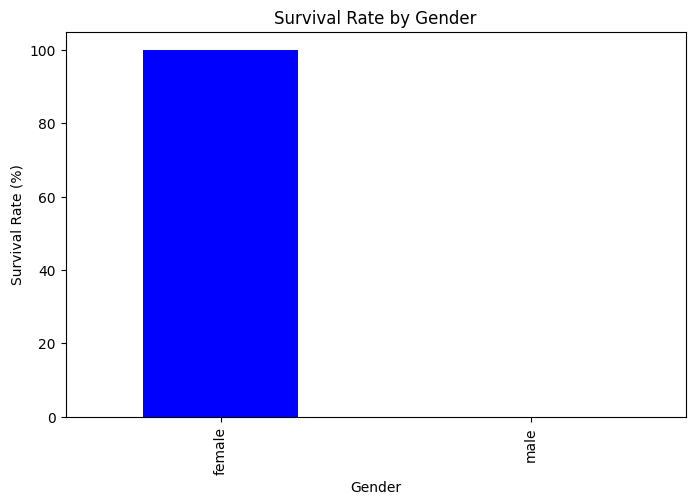

In [19]:
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_rate_by_sex)

plt.figure(figsize=(8, 5))
survival_rate_by_sex.plot(kind='bar', color=['blue', 'orange'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.show()

## survival by Pclass

        SurvivedCount  TotalPassengers  SurvivalRate
Pclass                                              
1                  50              107     46.728972
2                  30               93     32.258065
3                  72              218     33.027523


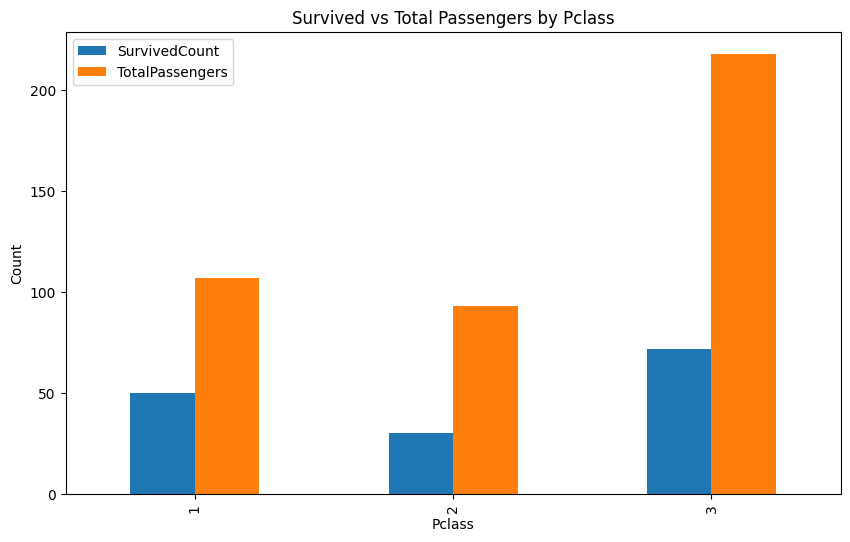

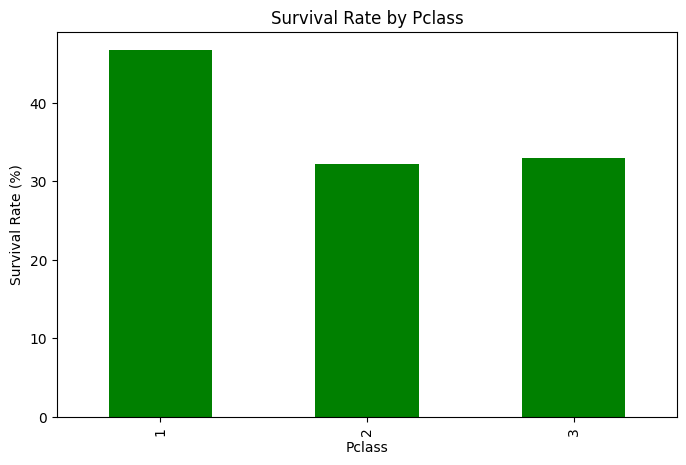

In [20]:
class_survival = df.groupby('Pclass').agg(
    SurvivedCount=('Survived', lambda x: (x == 1).sum()),
    TotalPassengers=('Survived', 'count')
)
class_survival['SurvivalRate'] = (class_survival['SurvivedCount'] / class_survival['TotalPassengers']) * 100
print(class_survival)

class_survival[['SurvivedCount', 'TotalPassengers']].plot(kind='bar', figsize=(10, 6))
plt.title('Survived vs Total Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

class_survival['SurvivalRate'].plot(kind='bar', figsize=(8, 5), color='green')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.show()
